In [91]:
# General packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats

# sklearn models
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

### Data loading and cleaning

In [197]:
# load both the train and test data set
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
test_ID = test_set['Id']

In [3]:
# check on dimensions
print(train_set.shape, test_set.shape)

(1460, 81) (1459, 80)


In [199]:
# Combine the train and test data set before data wrangling
full_set = train_set.merge(test_set, how = 'outer')

In [200]:
# Remove the Id column
full_set.drop('Id', axis = 1, inplace = True)

In [6]:
# use descrbie() to get more insight of the data distribution
full_set.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0


From the description, we notice some outliers such as extremely large LotFontage. However, it might be possible for some super mansions. Let's keep them for now. One outlier that is wrong for sure is the 2207 in the GarageYrBlt. It is very likely that this value should be 2007 instead. Let's replace it

In [201]:
full_set.GarageYrBlt.replace(2207,2007, inplace = True)

In [8]:
full_set.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0


Now try to deal with the missing value by first checking which columns have the missing value

In [9]:
# list down the missing value and its percentage 
missing = pd.concat([full_set.isna().sum(), full_set.isna().sum()/len(full_set)], axis = 1)
missing.columns = ['# of NaN','Percentage']
missing.sort_values('Percentage',ascending = False, inplace = True)
missing.head(40)

,# of NaN,Percentage
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471


Some missing values actually mean that the house doesn't have that specific features. We can replace those missing values with None

In [10]:
# The list of the meaningful missing values
None_list = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageFinish','GarageCond','GarageType','GarageType','GarageQual','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','MasVnrType']

In [202]:
# Replace the missing value with None

for feature in None_list:
    full_set[feature].fillna('None', inplace = True)

In [12]:
# Check out the remaining missing value
missing2 = pd.concat([full_set.isna().sum(), 100*full_set.isna().sum()/len(full_set)], axis = 1)
missing2.columns = ['# of missing values','Percentage']
missing2.sort_values('Percentage', ascending = False, inplace = True)
missing2.head(40)

,# of missing values,Percentage
SalePrice,1459,49.982871
LotFrontage,486,16.649538
GarageYrBlt,159,5.447071
MasVnrArea,23,0.787941
MSZoning,4,0.137033
Utilities,2,0.068517
Functional,2,0.068517
BsmtFullBath,2,0.068517
BsmtHalfBath,2,0.068517
Exterior1st,1,0.034258


Some missing values can be replaced by 0 to indicate that the house doesn't have that specific features

In [203]:
# Replace the following missing value with 0
no_such_feature = ['GarageYrBlt','GarageArea','MasVnrArea','GarageCars','BsmtHalfBath','BsmtFullBath','BsmtFinSF2','BsmtFinSF1','TotalBsmtSF','BsmtUnfSF']

full_set.update(full_set[no_such_feature].fillna(0))

In [14]:
full_set.isna().sum().sort_values(ascending = False).head(20)

SalePrice       1459
LotFrontage      486
MSZoning           4
Utilities          2
Functional         2
Exterior2nd        1
KitchenQual        1
Exterior1st        1
Electrical         1
SaleType           1
BsmtFinSF1         0
BsmtFinType1       0
RoofMatl           0
BsmtCond           0
BsmtQual           0
Foundation         0
ExterCond          0
ExterQual          0
MasVnrArea         0
MasVnrType         0
dtype: int64

For the missing values in LotFrontage, let's replace it with the mean value in the specific neighborhood the house belongs. Note that we want to use the mean from the traning set only in order to prevent data leakage

In [204]:
# create the lot mean for each neighborhood based on the training set
lot_mean = train_set.groupby('Neighborhood')['LotFrontage'].mean()
neighbor_list = list(full_set.Neighborhood.unique())

# replace the missing value in LotFrontage in the full data set by the lot mean
for neighbor in neighbor_list:
    mask = full_set['Neighborhood'] == neighbor
    full_set.loc[mask, 'LotFrontage'] = full_set.loc[mask, 'LotFrontage'].fillna(value = lot_mean[neighbor])

For the rest of the missing values, replace them with the most common value in its corresponding neighborhood

In [205]:
# Replace the missing values in the list below with the most common value
common_list = ['MSZoning','Utilities','Functional','KitchenQual','Exterior2nd','Exterior1st','SaleType','Electrical']

for feature in common_list:
    full_set[feature] = full_set.groupby('Neighborhood')[feature].transform(lambda x: x.fillna(x.mode()[0]))

In [206]:
# Replace the NA in Functional by Typ
full_set['Functional'] = full_set['Functional'].fillna('Typ')

In [18]:
# Check the dataset again to make sure all the missing values have been dealt with
full_set.isna().sum().sort_values(ascending = False)

SalePrice        1459
SaleCondition       0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
                 ... 
Functional          0
Fireplaces          0
FireplaceQu         0
GarageType          0
MSSubClass          0
Length: 80, dtype: int64

It may make more sense if we convert YearBuilt to the age of the house and the age of the house, let's create new feature for them

In [207]:
# create new feature for the age of the house
full_set['HouseAge'] = 2016 - full_set['YearBuilt']
# drop the YearBuilt axis since it is replaced by the HouseAge
full_set = full_set.drop('YearBuilt',axis = 1)

Convert some numerical features that are actually categorical features

In [208]:
# list of variables that should be categorical variables
to_cat = ['MSSubClass','OverallCond','MoSold','YrSold']
full_set[to_cat] = full_set[to_cat].astype('str')

In [21]:
# review the cleaned data set
full_set.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,None,0,2,2008,WD,Normal,208500.0,13
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,None,None,None,0,5,2007,WD,Normal,181500.0,40
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,None,None,None,0,9,2008,WD,Normal,223500.0,15
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,None,None,None,0,2,2006,WD,Abnorml,140000.0,101
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,None,None,None,0,12,2008,WD,Normal,250000.0,16


### Exploratory data analysis

Quickly take a look at the histogram for all the numerical parameters

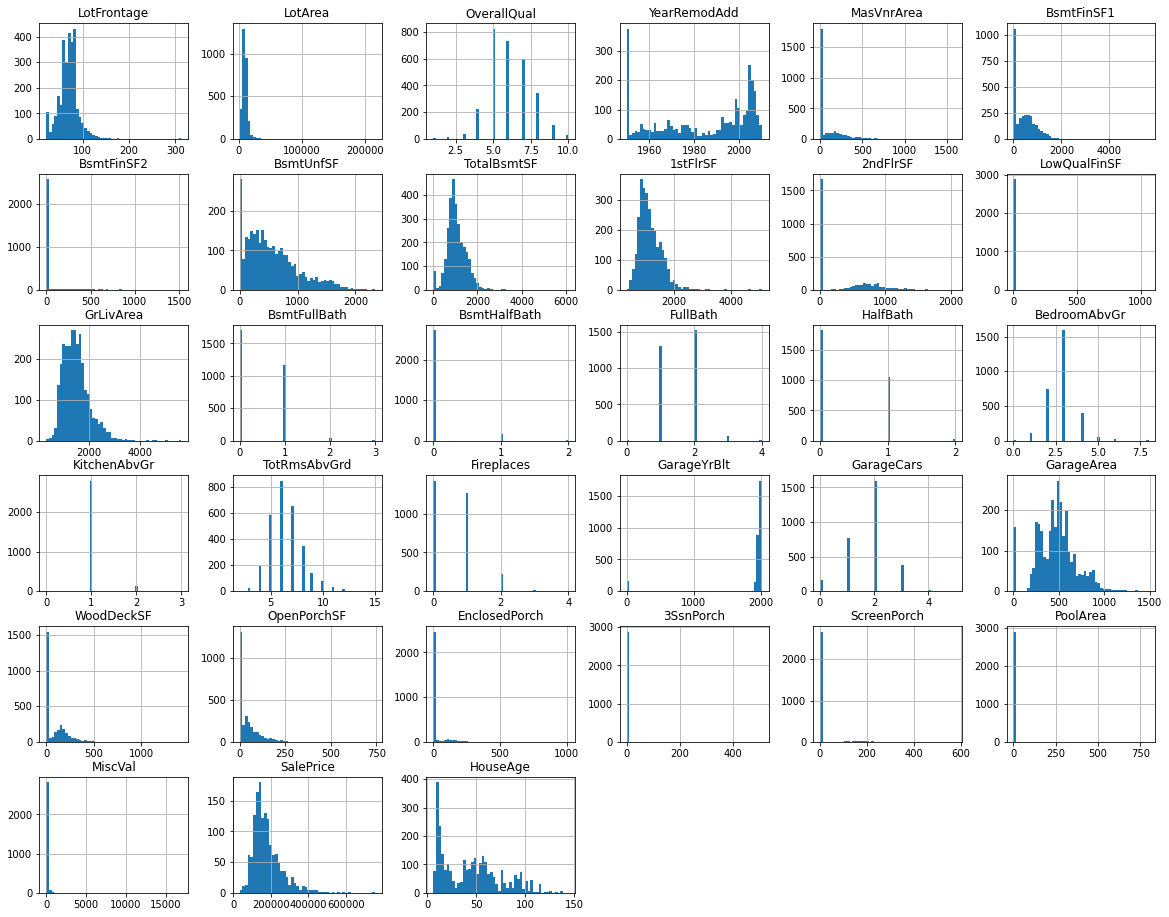

In [171]:
_= full_set.hist(bins = 50, figsize = (20,16))

Some data show skew and we may need to do log transform later. Some data show possible outliers. Will need to take a look later

Now let's be a little more quatitative and take a look at the correlation between each paramter

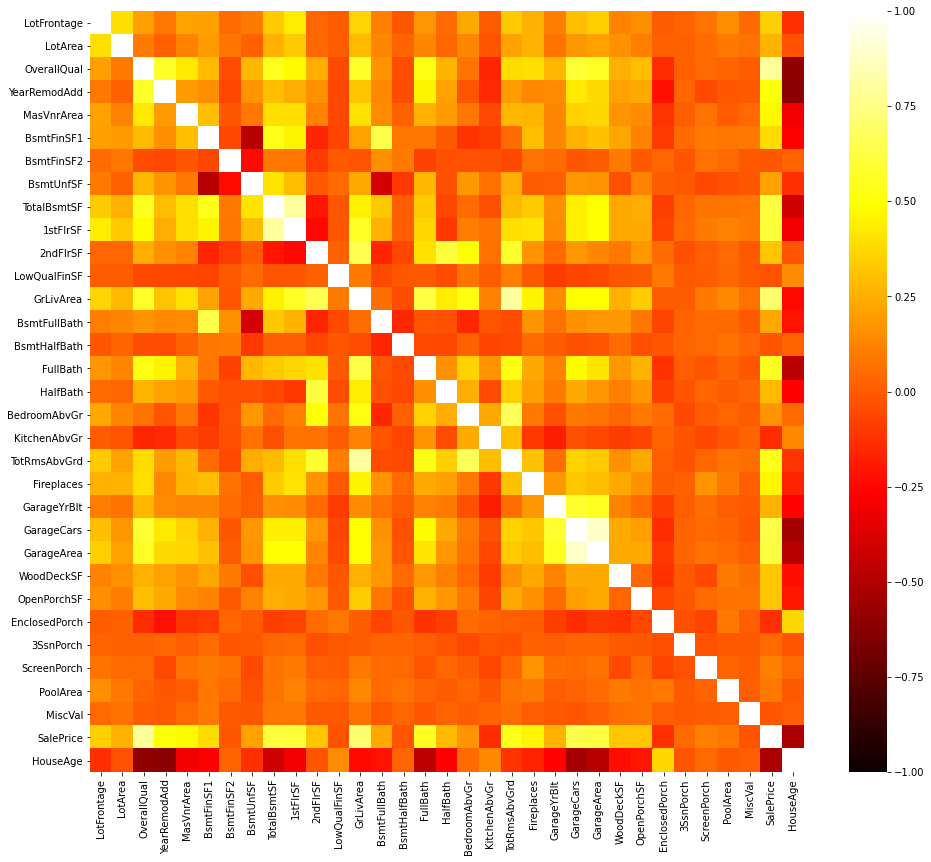

In [157]:
# plot the heatmap for the variables
corr = full_set.corr()
plt.figure(figsize=(16,14))
_= sns.heatmap(corr, cmap = 'hot',vmin = -1)

From the heatmap, we can see some variables are highly correlated with each other. For example TotalBsmtSF has high correlation with 1stFlrSF. This is understandable since the basement area should be very close to the first floor area. Similarly, GarageCars has high correlation to GarageArea since we need more garage area if we want to park more cars. We may only need to consider a single variable instead of two highly correlated variables during modeling stage. We could drop TotalBsmtSF and GarageCars in the future.

In [25]:
# get the actual correlation values between different variables and the SalePrice
cor_list = corr[['SalePrice']].abs().sort_values('SalePrice', ascending = False)
cor_list

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
HouseAge,0.522897


SalePrice is highly correlated to the OverallQual of the house and the GrLivArea, which is understandable. Next let's take a look at the scatter plot between different variables and the SalePrice

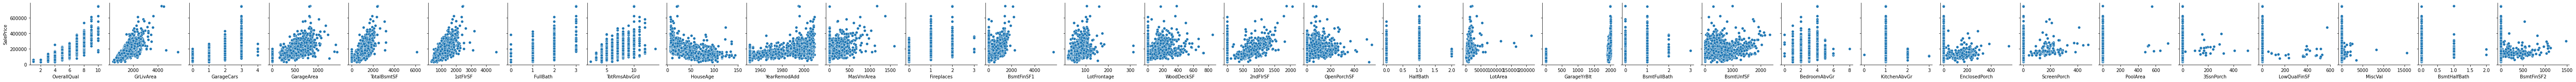

In [158]:
# scatter plot between variables and SalePrice
num_var = cor_list.index
_=sns.pairplot(full_set[num_var],x_vars = num_var[1:], y_vars = 'SalePrice',diag_kind = None)

### Outliers
We can see some outliers for GrLivArea, TotalBsmtSF, 1stFlrSF, BsmtFinSF1, LotFrontage, LotArea, let's remove them

In [210]:
# separate full data set into train and test data before removing outliers
df_train = full_set[~full_set.SalePrice.isnull()]
df_test = full_set[full_set.SalePrice.isnull()]

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

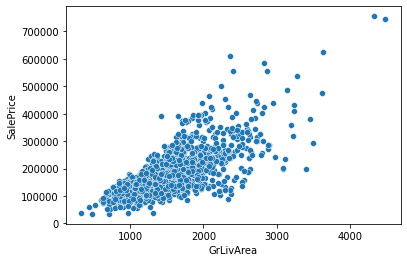

In [211]:
# Remove outliers for GrLivArea
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice'] < 300000)].index)
# replot to confirm
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = df_train)

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>

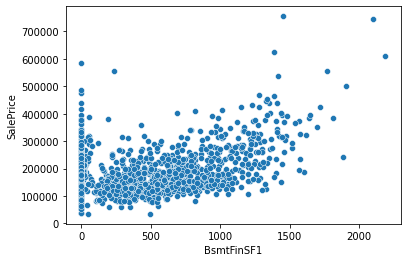

In [212]:
# Remove outlier in BsmtFinSF1
df_train = df_train[df_train['BsmtFinSF1']<4000]
# replot to confirm
sns.scatterplot(x = 'BsmtFinSF1', y = 'SalePrice', data = df_train)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

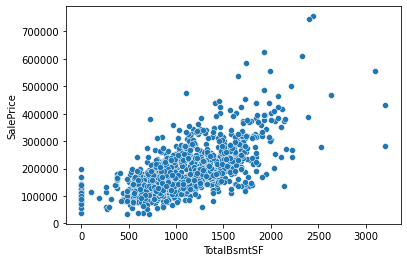

In [174]:
# Since BsmtFinSF1 and TotalBsmtSF are highly correlated, removing outliers in the BsmtFinsSF1 also removed the outliers
# in TotalBsmtSF, redo the scatter plot to confirm
sns.scatterplot(x = 'TotalBsmtSF', y = 'SalePrice', data = df_train)

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

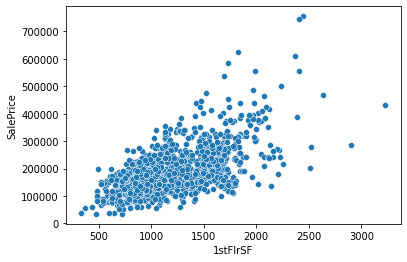

In [175]:
sns.scatterplot(x = '1stFlrSF', y = 'SalePrice', data = df_train)

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

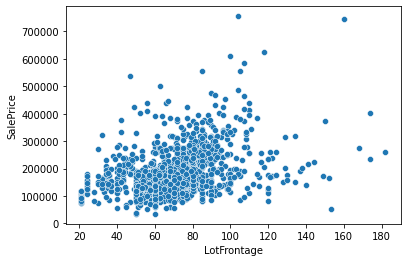

In [213]:
# Remove outliers in LotFrontage
df_train = df_train[df_train['LotFrontage']<300]
sns.scatterplot(x = 'LotFrontage', y = 'SalePrice', data = df_train)

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

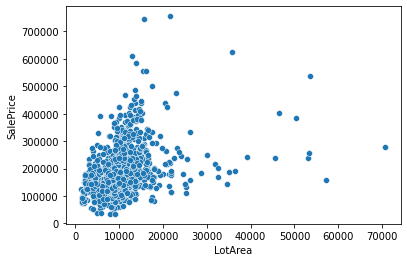

In [214]:
# Remove the outliers in LotArea
df_train = df_train[df_train['LotArea']<100000]
sns.scatterplot(x = 'LotArea', y = 'SalePrice', data = df_train)

### More visualization with categorical variables

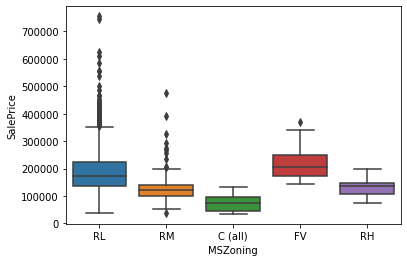

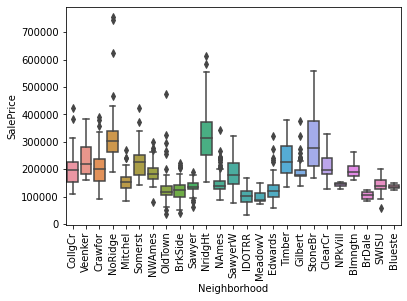

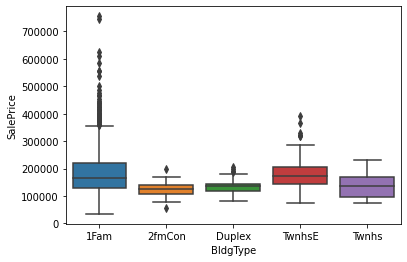

In [34]:
# visualize some categorical data
_ = sns.boxplot(data = df_train, x = 'MSZoning', y = 'SalePrice')
plt.figure()
g = sns.boxplot(data = df_train, x = 'Neighborhood', y = 'SalePrice')
plt.setp(g.get_xticklabels(), rotation=90)
plt.figure()
_= sns.boxplot(data = full_set, x = 'BldgType', y = 'SalePrice')

For examples, MSZoning variable: RL showed more outliers than RM than RH, this may be due to that it is more likely to have mansion style house in the lower residential density region. Neighborhood: different neighborhood also showed different house price. Condition1: adjacent to artery street or railroad normally have lower house price probably due to the noisy enviroment. BldgType: it is more likely to have high sale price for single family style. We can make similar observation and comments for many other variables. It should be more clear in the modeling stage.

### Normality
Next let's check out the normality of the sale price

C:\Users\Yiming Lai\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


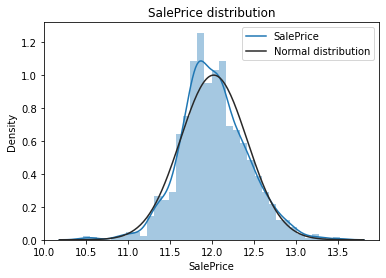

In [223]:
# take a look at the sale price distribution
_ = sns.distplot(df_train['SalePrice'], fit = norm)
plt.title('SalePrice distribution')
plt.legend(['SalePrice','Normal distribution'])
plt.show()

From the histogram we can see the sale price is not normaly distributed and has some positve skew. Let's also get the skewness and kurtosis values

In [179]:
print('Skewness =', df_train.SalePrice.skew(),',Kurtosis =',df_train.SalePrice.kurt())

Skewness = 1.898324553800865 ,Kurtosis = 6.635746715723067


We can do log-transform on the sale price to fix the skew

C:\Users\Yiming Lai\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness = 0.12565092048343543 ,Kurtosis = 0.8259042228506215


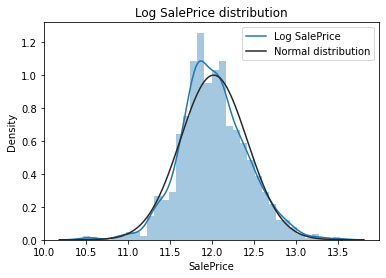

In [215]:
# log tranform on sale price
df_train['SalePrice'] = np.log(df_train[['SalePrice']])

# re-check the histogram and QQ-plot
_ = sns.distplot(df_train['SalePrice'], fit = norm)
plt.title('Log SalePrice distribution')
plt.legend(['Log SalePrice','Normal distribution'])

print('Skewness =', df_train.SalePrice.skew(),',Kurtosis =',df_train.SalePrice.kurt())

The sale price distribution is close to normal now

### Categorical variables
Do one hot enconding to convert categorical variables into dummy variables

In [216]:
# recombine training and testing data before doing 1hot encoding
full_set = df_train.merge(df_test, how = 'outer')

In [217]:
# One hot encoding
full_set_1hot = pd.get_dummies(full_set)

In [218]:
# check the shape of the new df_train
print(full_set_1hot.shape)
full_set_1hot.head().T

(2912, 340)


,0,1,2,3,4
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0
OverallQual,7.0,6.0,7.0,7.0,8.0
YearRemodAdd,2003.0,1976.0,2002.0,1970.0,2000.0
MasVnrArea,196.0,0.0,162.0,0.0,350.0
...,...,...,...,...,...
SaleCondition_AdjLand,0.0,0.0,0.0,0.0,0.0
SaleCondition_Alloca,0.0,0.0,0.0,0.0,0.0
SaleCondition_Family,0.0,0.0,0.0,0.0,0.0
SaleCondition_Normal,1.0,1.0,1.0,0.0,1.0


### Modeling

We will try ridge regression, SVR, random forest and XGBoost to train the model. Let's first divide the data into 80% training set and 20% validation set

In [219]:
# split the data into training set and validation set
train = full_set_1hot[~full_set_1hot.SalePrice.isnull()]
X = train.drop('SalePrice', axis = 1)
y = train['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

Now we can setup the models we need

In [41]:
# Setting up the models

# Set up Ridge Regressior

ridge = Pipeline(steps = [('scaler',StandardScaler()), ('ridge',Ridge())])

# Set up SVR

svr = Pipeline(steps = [('scaler',StandardScaler()), ('svr',SVR())])

# Set up Random Forest Regressor

rf = RandomForestRegressor(random_state = 42)

# Set up XGBoost

xgb = XGBRegressor(objective = 'reg:linear', random_state = 42)

We then perform the GridSearchCV to tune the hyperparameters

In [51]:
# set up the hyperfine parameters for each model

# parameter grid for Ridge Regressor
ridge_param_grid = {'ridge__alpha':[0.001, 0.01, 0.1, 1,5,10,20, 50, 100, 200, 500, 1000]}

# parameter grid for SVR
svr_param_grid = {'svr__C':[0.1, 1,10,20]}

# parameter grid for Random Forest Regressor
rf_param_grid = {'n_estimators':[100, 200, 500], 'max_depth':[5,10,15], 'min_samples_split':[5,10],'min_samples_leaf':[5,10,15]}

# parameter grid for XGBoost
xgb_param_grid = {'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.3], 'n_estimators':[100, 200, 500],'max_depth':[5,10,15]}

Now we can use GridSearchCV to find the best parameters, here we set CV to 10 and use MSE as the figure of merit

In [52]:
# GridSearchCV for Ridge Regressor

ridge_cv = GridSearchCV(ridge, param_grid = ridge_param_grid, cv = 10, scoring = 'neg_mean_squared_error', return_train_score = True)
ridge_cv.fit(X_train, y_train)

# Print the best hyperparameters
print(ridge_cv.best_params_)

# Show the score for each parameter set
ridge_cvres = ridge_cv.cv_results_
for mean_score, params in zip(ridge_cvres['mean_test_score'], ridge_cvres['params']):
    print(np.sqrt(-mean_score), params)

{'ridge__alpha': 200}
0.14137492288905873 {'ridge__alpha': 0.001}
0.1406544997419098 {'ridge__alpha': 0.01}
0.13640183629303726 {'ridge__alpha': 0.1}
0.1317744614346632 {'ridge__alpha': 1}
0.12944079895312752 {'ridge__alpha': 5}
0.12764619365171517 {'ridge__alpha': 10}
0.12548679955488903 {'ridge__alpha': 20}
0.12265996988475403 {'ridge__alpha': 50}
0.12088124242481152 {'ridge__alpha': 100}
0.11968677944312402 {'ridge__alpha': 200}
0.12047657088170334 {'ridge__alpha': 500}
0.1249989499123101 {'ridge__alpha': 1000}


In [44]:
# GridSearchCV for SVR

svr_cv = GridSearchCV(svr, param_grid = svr_param_grid, cv = 10, scoring = 'neg_mean_squared_error', return_train_score = True)
svr_cv.fit(X_train, y_train)

# Print the best hyperparameters
print(svr_cv.best_params_)

# Show the score for each parameter set
svr_cvres = svr_cv.cv_results_
for mean_score, params in zip(svr_cvres['mean_test_score'], svr_cvres['params']):
    print(np.sqrt(-mean_score), params)

{'svr__C': 1}
0.21460890345735803 {'svr__C': 0.1}
0.19404624265799597 {'svr__C': 1}
0.19441743095732308 {'svr__C': 10}
0.19441743095732308 {'svr__C': 20}


In [45]:
# GridSearchCV for Random Forest

rf_cv = GridSearchCV(rf, param_grid = rf_param_grid, cv = 10, scoring = 'neg_mean_squared_error', return_train_score = True,verbose = 5)
rf_cv.fit(X_train, y_train)

# Print the best hyperparameters
print(rf_cv.best_params_)


# Show the score for each parameter set
rf_cvres = rf_cv.cv_results_
for mean_score, params in zip(rf_cvres['mean_test_score'], rf_cvres['params']):
    print(np.sqrt(-mean_score), params)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=-0.018, test=-0.016), total=   1.4s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=-0.017, test=-0.025), total=   1.5s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=-0.016, test=-0.038), total=   1.8s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.8s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=-0.017, test=-0.023), total=   2.8s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.7s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=-0.017, test=-0.024), total=   1.9s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=-0.017, test=-0.026), total=   2.7s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=-0.017, test=-0.030), total=   1.5s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=-0.017, test=-0.031), total=   1.3s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=-0.017, test=-0.023), total=   1.4s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=5

[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=-0.017, test=-0.025), total=   2.7s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=-0.017, test=-0.029), total=   2.8s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=-0.017, test=-0.031), total=   3.5s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=-0.017, test=-0.023), total=   2.4s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=-0.016, test=-0.032), total=   2.4s
[CV] max_depth=5, min_samples_leaf=5, min_sample

[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=500, score=(train=-0.019, test=-0.026), total=   6.0s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=500 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=500, score=(train=-0.018, test=-0.029), total=   5.9s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=500 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=500, score=(train=-0.018, test=-0.031), total=   6.1s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=500 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=500, score=(train=-0.019, test=-0.023), total=   5.8s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=500 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=500, score=(train=-0.018, test=-0.032), total=   6.2s
[CV] max_depth=5, min_samples_leaf=10, min_sampl

[CV]  max_depth=5, min_samples_leaf=15, min_samples_split=5, n_estimators=100, score=(train=-0.021, test=-0.027), total=   1.2s
[CV] max_depth=5, min_samples_leaf=15, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=15, min_samples_split=5, n_estimators=100, score=(train=-0.020, test=-0.031), total=   1.2s
[CV] max_depth=5, min_samples_leaf=15, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=15, min_samples_split=5, n_estimators=100, score=(train=-0.020, test=-0.033), total=   1.2s
[CV] max_depth=5, min_samples_leaf=15, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=15, min_samples_split=5, n_estimators=100, score=(train=-0.020, test=-0.024), total=   1.3s
[CV] max_depth=5, min_samples_leaf=15, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, min_samples_leaf=15, min_samples_split=5, n_estimators=100, score=(train=-0.020, test=-0.032), total=   1.4s
[CV] max_depth=5, min_samples_leaf=15, min_sampl

[CV]  max_depth=5, min_samples_leaf=15, min_samples_split=10, n_estimators=200, score=(train=-0.021, test=-0.027), total=   2.4s
[CV] max_depth=5, min_samples_leaf=15, min_samples_split=10, n_estimators=200 
[CV]  max_depth=5, min_samples_leaf=15, min_samples_split=10, n_estimators=200, score=(train=-0.020, test=-0.031), total=   2.3s
[CV] max_depth=5, min_samples_leaf=15, min_samples_split=10, n_estimators=200 
[CV]  max_depth=5, min_samples_leaf=15, min_samples_split=10, n_estimators=200, score=(train=-0.020, test=-0.033), total=   2.2s
[CV] max_depth=5, min_samples_leaf=15, min_samples_split=10, n_estimators=200 
[CV]  max_depth=5, min_samples_leaf=15, min_samples_split=10, n_estimators=200, score=(train=-0.020, test=-0.023), total=   2.3s
[CV] max_depth=5, min_samples_leaf=15, min_samples_split=10, n_estimators=200 
[CV]  max_depth=5, min_samples_leaf=15, min_samples_split=10, n_estimators=200, score=(train=-0.020, test=-0.032), total=   2.3s
[CV] max_depth=5, min_samples_leaf=15, 

[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=500, score=(train=-0.009, test=-0.019), total=   9.7s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=500, score=(train=-0.009, test=-0.023), total=   8.8s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=500, score=(train=-0.009, test=-0.026), total=   9.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=500, score=(train=-0.009, test=-0.020), total=   8.7s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=500, score=(train=-0.009, test=-0.028), total=   8.5s
[CV] max_depth=10, min_samples_leaf=5, min_sampl

[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=(train=-0.014, test=-0.021), total=   1.5s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=(train=-0.014, test=-0.026), total=   1.4s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=(train=-0.014, test=-0.029), total=   1.5s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=(train=-0.014, test=-0.022), total=   1.4s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=(train=-0.014, test=-0.029), total=   1.4s
[CV] max_depth=10, min_samples_leaf=10,

[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=200, score=(train=-0.014, test=-0.021), total=   2.9s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=200, score=(train=-0.014, test=-0.027), total=   2.9s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=200, score=(train=-0.014, test=-0.028), total=   3.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=200, score=(train=-0.014, test=-0.021), total=   2.9s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=200 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=200, score=(train=-0.014, test=-0.029), total=   4.3s
[CV] max_depth=10, min_samples

[CV]  max_depth=10, min_samples_leaf=15, min_samples_split=5, n_estimators=500, score=(train=-0.018, test=-0.024), total=   7.1s
[CV] max_depth=10, min_samples_leaf=15, min_samples_split=5, n_estimators=500 
[CV]  max_depth=10, min_samples_leaf=15, min_samples_split=5, n_estimators=500, score=(train=-0.018, test=-0.028), total=   6.4s
[CV] max_depth=10, min_samples_leaf=15, min_samples_split=5, n_estimators=500 
[CV]  max_depth=10, min_samples_leaf=15, min_samples_split=5, n_estimators=500, score=(train=-0.018, test=-0.031), total=   6.5s
[CV] max_depth=10, min_samples_leaf=15, min_samples_split=5, n_estimators=500 
[CV]  max_depth=10, min_samples_leaf=15, min_samples_split=5, n_estimators=500, score=(train=-0.018, test=-0.023), total=   6.7s
[CV] max_depth=10, min_samples_leaf=15, min_samples_split=5, n_estimators=500 
[CV]  max_depth=10, min_samples_leaf=15, min_samples_split=5, n_estimators=500, score=(train=-0.017, test=-0.031), total=   6.4s
[CV] max_depth=10, min_samples_leaf=15,

[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=-0.009, test=-0.019), total=   2.2s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=-0.009, test=-0.024), total=   1.7s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=-0.009, test=-0.026), total=   1.7s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=-0.009, test=-0.020), total=   1.7s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=(train=-0.009, test=-0.028), total=   1.7s
[CV] max_depth=15, min_samples_leaf=5, min_sampl

[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=-0.009, test=-0.019), total=   3.3s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=-0.009, test=-0.024), total=   3.6s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=-0.009, test=-0.026), total=   3.3s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=-0.009, test=-0.020), total=   3.3s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=200, score=(train=-0.009, test=-0.028), total=   3.5s
[CV] max_depth=15, min_samples_leaf=5, 

[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=500, score=(train=-0.014, test=-0.021), total=   6.9s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=500 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=500, score=(train=-0.014, test=-0.026), total=   7.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=500 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=500, score=(train=-0.014, test=-0.028), total=   6.9s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=500 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=500, score=(train=-0.014, test=-0.021), total=   6.8s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=500 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=500, score=(train=-0.014, test=-0.029), total=   7.2s
[CV] max_depth=15, min_samples_leaf=10,

[CV]  max_depth=15, min_samples_leaf=15, min_samples_split=5, n_estimators=100, score=(train=-0.018, test=-0.024), total=   2.3s
[CV] max_depth=15, min_samples_leaf=15, min_samples_split=5, n_estimators=100 
[CV]  max_depth=15, min_samples_leaf=15, min_samples_split=5, n_estimators=100, score=(train=-0.018, test=-0.029), total=   1.6s
[CV] max_depth=15, min_samples_leaf=15, min_samples_split=5, n_estimators=100 
[CV]  max_depth=15, min_samples_leaf=15, min_samples_split=5, n_estimators=100, score=(train=-0.018, test=-0.031), total=   1.3s
[CV] max_depth=15, min_samples_leaf=15, min_samples_split=5, n_estimators=100 
[CV]  max_depth=15, min_samples_leaf=15, min_samples_split=5, n_estimators=100, score=(train=-0.018, test=-0.023), total=   1.4s
[CV] max_depth=15, min_samples_leaf=15, min_samples_split=5, n_estimators=100 
[CV]  max_depth=15, min_samples_leaf=15, min_samples_split=5, n_estimators=100, score=(train=-0.018, test=-0.031), total=   2.5s
[CV] max_depth=15, min_samples_leaf=15,

[CV]  max_depth=15, min_samples_leaf=15, min_samples_split=10, n_estimators=200, score=(train=-0.018, test=-0.023), total=   2.5s
[CV] max_depth=15, min_samples_leaf=15, min_samples_split=10, n_estimators=200 
[CV]  max_depth=15, min_samples_leaf=15, min_samples_split=10, n_estimators=200, score=(train=-0.018, test=-0.029), total=   2.6s
[CV] max_depth=15, min_samples_leaf=15, min_samples_split=10, n_estimators=200 
[CV]  max_depth=15, min_samples_leaf=15, min_samples_split=10, n_estimators=200, score=(train=-0.018, test=-0.031), total=   2.6s
[CV] max_depth=15, min_samples_leaf=15, min_samples_split=10, n_estimators=200 
[CV]  max_depth=15, min_samples_leaf=15, min_samples_split=10, n_estimators=200, score=(train=-0.018, test=-0.023), total=   2.9s
[CV] max_depth=15, min_samples_leaf=15, min_samples_split=10, n_estimators=200 
[CV]  max_depth=15, min_samples_leaf=15, min_samples_split=10, n_estimators=200, score=(train=-0.017, test=-0.031), total=   2.6s
[CV] max_depth=15, min_samples

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 35.6min finished


{'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 200}
0.1635158577800932 {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}
0.1627897548314478 {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 200}
0.1627954828629724 {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 500}
0.1635158577800932 {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}
0.1627897548314478 {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}
0.1627954828629724 {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 500}
0.16425935034427086 {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 100}
0.16375032847240004 {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 200}
0.1638984662364872 {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_sp

In [46]:
# GridSearchCV for XGBoost

xgb_cv = GridSearchCV(xgb, param_grid = xgb_param_grid, cv = 10, scoring = 'neg_mean_squared_error', return_train_score = True, verbose = 5)
xgb_cv.fit(X_train, y_train)

# Print the best hyperparameters
print(xgb_cv.best_params_)

# Show the score for each parameter set
xgb_cvres = xgb_cv.cv_results_
for mean_score, params in zip(xgb_cvres['mean_test_score'], xgb_cvres['params']):
    print(np.sqrt(-mean_score), params)

Fitting 10 folds for each of 45 candidates, totalling 450 fits
[CV] learning_rate=0.001, max_depth=5, n_estimators=100 ..............
[00:49:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.001, max_depth=5, n_estimators=100, score=(train=-108.963, test=-108.001), total=   0.5s
[CV] learning_rate=0.001, max_depth=5, n_estimators=100 ..............
[00:49:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  learning_rate=0.001, max_depth=5, n_estimators=100, score=(train=-108.900, test=-108.622), total=   0.4s
[CV] learning_rate=0.001, max_depth=5, n_estimators=100 ..............
[00:49:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  learning_rate=0.001, max_depth=5, n_estimators=100, score=(train=-108.870, test=-108.928), total=   0.4s
[CV] learning_rate=0.001, max_depth=5, n_estimators=100 ..............
[00:49:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s


[CV]  learning_rate=0.001, max_depth=5, n_estimators=100, score=(train=-109.015, test=-107.474), total=   0.4s
[CV] learning_rate=0.001, max_depth=5, n_estimators=100 ..............
[00:49:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s


[CV]  learning_rate=0.001, max_depth=5, n_estimators=100, score=(train=-108.858, test=-109.057), total=   0.4s
[CV] learning_rate=0.001, max_depth=5, n_estimators=100 ..............
[00:49:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=5, n_estimators=100, score=(train=-108.917, test=-108.454), total=   0.4s
[CV] learning_rate=0.001, max_depth=5, n_estimators=100 ..............
[00:49:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=5, n_estimators=100, score=(train=-108.814, test=-109.495), total=   0.4s
[CV] learning_rate=0.001, max_depth=5, n_estimators=100 ..............
[00:49:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=5, n_estimators=100, score=(train=-108.794, test=-109.691), total=   

[CV]  learning_rate=0.001, max_depth=10, n_estimators=100, score=(train=-108.870, test=-108.928), total=   0.4s
[CV] learning_rate=0.001, max_depth=10, n_estimators=100 .............
[00:49:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=10, n_estimators=100, score=(train=-109.015, test=-107.474), total=   0.4s
[CV] learning_rate=0.001, max_depth=10, n_estimators=100 .............
[00:49:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=10, n_estimators=100, score=(train=-108.858, test=-109.057), total=   0.4s
[CV] learning_rate=0.001, max_depth=10, n_estimators=100 .............
[00:49:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=10, n_estimators=100, score=(train=-108.917, test=-108.454), total

[CV]  learning_rate=0.001, max_depth=15, n_estimators=100, score=(train=-108.963, test=-108.001), total=   0.4s
[CV] learning_rate=0.001, max_depth=15, n_estimators=100 .............
[00:50:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=15, n_estimators=100, score=(train=-108.900, test=-108.622), total=   0.4s
[CV] learning_rate=0.001, max_depth=15, n_estimators=100 .............
[00:50:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=15, n_estimators=100, score=(train=-108.870, test=-108.928), total=   0.4s
[CV] learning_rate=0.001, max_depth=15, n_estimators=100 .............
[00:50:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=15, n_estimators=100, score=(train=-109.015, test=-107.474), total

[CV]  learning_rate=0.001, max_depth=15, n_estimators=500, score=(train=-48.980, test=-49.560), total=   2.1s
[CV] learning_rate=0.001, max_depth=15, n_estimators=500 .............
[00:50:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=15, n_estimators=500, score=(train=-49.007, test=-49.182), total=   2.2s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100 ...............
[00:51:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, score=(train=-17.962, test=-17.698), total=   0.5s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100 ...............
[00:51:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, score=(train=-17.950, test=-17.937), total=   0.5s
[CV

[CV]  learning_rate=0.01, max_depth=5, n_estimators=500, score=(train=-0.014, test=-0.024), total=   7.0s
[CV] learning_rate=0.01, max_depth=5, n_estimators=500 ...............
[00:52:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=5, n_estimators=500, score=(train=-0.014, test=-0.028), total=   7.7s
[CV] learning_rate=0.01, max_depth=5, n_estimators=500 ...............
[00:52:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=5, n_estimators=500, score=(train=-0.014, test=-0.019), total=   6.2s
[CV] learning_rate=0.01, max_depth=5, n_estimators=500 ...............
[00:52:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=5, n_estimators=500, score=(train=-0.014, test=-0.029), total=   5.8s
[CV] learning_r

[CV]  learning_rate=0.01, max_depth=10, n_estimators=500, score=(train=-0.011, test=-0.023), total=   9.3s
[CV] learning_rate=0.01, max_depth=10, n_estimators=500 ..............
[00:53:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=10, n_estimators=500, score=(train=-0.010, test=-0.026), total=   8.2s
[CV] learning_rate=0.01, max_depth=10, n_estimators=500 ..............
[00:53:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=10, n_estimators=500, score=(train=-0.010, test=-0.023), total=   9.5s
[CV] learning_rate=0.01, max_depth=10, n_estimators=500 ..............
[00:53:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=10, n_estimators=500, score=(train=-0.010, test=-0.027), total=   9.7s
[CV] learni

[CV]  learning_rate=0.01, max_depth=15, n_estimators=500, score=(train=-0.010, test=-0.032), total=  11.2s
[CV] learning_rate=0.01, max_depth=15, n_estimators=500 ..............
[00:55:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15, n_estimators=500, score=(train=-0.010, test=-0.029), total=  11.4s
[CV] learning_rate=0.01, max_depth=15, n_estimators=500 ..............
[00:55:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15, n_estimators=500, score=(train=-0.010, test=-0.023), total=  11.5s
[CV] learning_rate=0.01, max_depth=15, n_estimators=500 ..............
[00:55:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15, n_estimators=500, score=(train=-0.010, test=-0.026), total=  14.0s
[CV] learni

[CV]  learning_rate=0.1, max_depth=5, n_estimators=500, score=(train=-0.000, test=-0.019), total=   6.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=500 ................
[00:57:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=5, n_estimators=500, score=(train=-0.000, test=-0.030), total=   6.4s
[CV] learning_rate=0.1, max_depth=5, n_estimators=500 ................
[00:57:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=5, n_estimators=500, score=(train=-0.000, test=-0.017), total=   6.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=500 ................
[00:57:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=5, n_estimators=500, score=(train=-0.000, test=-0.014), total=   6.3s
[CV] learning_rate=

[CV]  learning_rate=0.1, max_depth=10, n_estimators=200, score=(train=-0.000, test=-0.022), total=   4.8s
[CV] learning_rate=0.1, max_depth=10, n_estimators=500 ...............
[00:59:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=500, score=(train=-0.000, test=-0.010), total=   8.7s
[CV] learning_rate=0.1, max_depth=10, n_estimators=500 ...............
[00:59:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=500, score=(train=-0.000, test=-0.017), total=   8.1s
[CV] learning_rate=0.1, max_depth=10, n_estimators=500 ...............
[00:59:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=500, score=(train=-0.000, test=-0.031), total=   6.7s
[CV] learning_r

[CV]  learning_rate=0.1, max_depth=15, n_estimators=200, score=(train=-0.000, test=-0.018), total=   6.9s
[CV] learning_rate=0.1, max_depth=15, n_estimators=200 ...............
[01:02:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=15, n_estimators=200, score=(train=-0.000, test=-0.013), total=   6.9s
[CV] learning_rate=0.1, max_depth=15, n_estimators=200 ...............
[01:02:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=15, n_estimators=200, score=(train=-0.000, test=-0.024), total=   5.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=500 ...............
[01:02:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=15, n_estimators=500, score=(train=-0.000, test=-0.011), total=   6.5s
[CV] learning_r

[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, score=(train=-0.000, test=-0.018), total=   2.5s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200 ................
[01:03:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, score=(train=-0.000, test=-0.016), total=   2.5s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200 ................
[01:03:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, score=(train=-0.000, test=-0.012), total=   2.6s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200 ................
[01:04:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, score=(train=-0.000, test=-0.021), total=   2.6s
[CV] learning_rate=

[CV]  learning_rate=0.2, max_depth=10, n_estimators=200, score=(train=-0.000, test=-0.015), total=   2.9s
[CV] learning_rate=0.2, max_depth=10, n_estimators=200 ...............
[01:05:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.2, max_depth=10, n_estimators=200, score=(train=-0.000, test=-0.018), total=   2.7s
[CV] learning_rate=0.2, max_depth=10, n_estimators=200 ...............
[01:05:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.2, max_depth=10, n_estimators=200, score=(train=-0.000, test=-0.018), total=   3.0s
[CV] learning_rate=0.2, max_depth=10, n_estimators=200 ...............
[01:05:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.2, max_depth=10, n_estimators=200, score=(train=-0.000, test=-0.014), total=   2.8s
[CV] learning_r

[CV]  learning_rate=0.2, max_depth=15, n_estimators=200, score=(train=-0.000, test=-0.017), total=   2.7s
[CV] learning_rate=0.2, max_depth=15, n_estimators=200 ...............
[01:07:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.2, max_depth=15, n_estimators=200, score=(train=-0.000, test=-0.018), total=   2.7s
[CV] learning_rate=0.2, max_depth=15, n_estimators=200 ...............
[01:07:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.2, max_depth=15, n_estimators=200, score=(train=-0.000, test=-0.018), total=   2.9s
[CV] learning_rate=0.2, max_depth=15, n_estimators=200 ...............
[01:07:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.2, max_depth=15, n_estimators=200, score=(train=-0.000, test=-0.020), total=   2.8s
[CV] learning_r

[CV]  learning_rate=0.3, max_depth=5, n_estimators=200, score=(train=-0.000, test=-0.022), total=   2.4s
[CV] learning_rate=0.3, max_depth=5, n_estimators=200 ................
[01:08:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.3, max_depth=5, n_estimators=200, score=(train=-0.000, test=-0.028), total=   2.3s
[CV] learning_rate=0.3, max_depth=5, n_estimators=200 ................
[01:08:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.3, max_depth=5, n_estimators=200, score=(train=-0.000, test=-0.020), total=   2.5s
[CV] learning_rate=0.3, max_depth=5, n_estimators=200 ................
[01:08:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.3, max_depth=5, n_estimators=200, score=(train=-0.000, test=-0.016), total=   2.4s
[CV] learning_rate=

[CV]  learning_rate=0.3, max_depth=10, n_estimators=200, score=(train=-0.000, test=-0.016), total=   2.0s
[CV] learning_rate=0.3, max_depth=10, n_estimators=200 ...............
[01:09:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.3, max_depth=10, n_estimators=200, score=(train=-0.000, test=-0.018), total=   2.3s
[CV] learning_rate=0.3, max_depth=10, n_estimators=200 ...............
[01:09:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.3, max_depth=10, n_estimators=200, score=(train=-0.000, test=-0.032), total=   2.1s
[CV] learning_rate=0.3, max_depth=10, n_estimators=200 ...............
[01:09:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.3, max_depth=10, n_estimators=200, score=(train=-0.000, test=-0.020), total=   2.1s
[CV] learning_r

[CV]  learning_rate=0.3, max_depth=15, n_estimators=100, score=(train=-0.000, test=-0.018), total=   1.7s
[CV] learning_rate=0.3, max_depth=15, n_estimators=100 ...............
[01:10:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.3, max_depth=15, n_estimators=100, score=(train=-0.000, test=-0.030), total=   1.9s
[CV] learning_rate=0.3, max_depth=15, n_estimators=200 ...............
[01:10:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.3, max_depth=15, n_estimators=200, score=(train=-0.000, test=-0.016), total=   2.1s
[CV] learning_rate=0.3, max_depth=15, n_estimators=200 ...............
[01:10:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.3, max_depth=15, n_estimators=200, score=(train=-0.000, test=-0.020), total=   2.0s
[CV] learning_r

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed: 22.6min finished


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
10.434387732002264 {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 100}
9.443407493466946 {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 200}
7.001772248964507 {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 500}
10.434387732002264 {'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 100}
9.443407493466946 {'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 200}
7.001772248964507 {'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 500}
10.434387732002264 {'learning_rate': 0.001, 'max_depth': 15, 'n_estimators': 100}
9.443407493466946 {'learning_rate': 0.001, 'max_depth': 15, 'n_estimators': 200}
7.001772248964507 {'learning_rate': 0.001, 'max_depth': 15, 'n_estimators': 500}
4.236838844975261 {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
1.5682489221794598 {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
0.15879389693866344 {'learning_rate': 0.01, 'max_dep

Now we have the best hyperparameters, next we want to check how each model performs on the unseen data by using the validation data set

In [191]:
# Ridge Regressor
ridge = Pipeline(steps = [('scaler',StandardScaler()), ('ridge',Ridge(alpha=200))])
ridge.fit(X_train, y_train)
ridge_y_pred = ridge.predict(X_val)
print('RMSE for Ridge Regressor: {}'.format(np.sqrt(mean_squared_error(y_val,ridge_y_pred))))

RMSE for Ridge Regressor: 0.10862661615962747


In [192]:
# SVR
svr = Pipeline(steps = [('scaler',StandardScaler()), ('svr',SVR(C=1))])
svr.fit(X_train, y_train)
svr_y_pred = svr.predict(X_val)
print('RMSE for SVR: {}'.format(np.sqrt(mean_squared_error(y_val,svr_y_pred))))

RMSE for SVR: 0.18862594089454282


In [65]:
# Random Forest Regressor
rf = RandomForestRegressor(random_state = 42, max_depth = 15, min_samples_leaf = 5, min_samples_split = 5, n_estimators = 200)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_val)
print('RMSE for Random Forest Regressor: {}'.format(np.sqrt(mean_squared_error(y_val,rf_y_pred))))

RMSE for Random Forest Regressor: 0.135829791875787


In [66]:
# XGBoost
xgb = XGBRegressor(objective = 'reg:linear', random_state = 42,learning_rate = 0.1, max_depth = 5, n_estimators = 200)
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_val)
print('RMSE for XGBoost: {}'.format(np.sqrt(mean_squared_error(y_val,xgb_y_pred))))

[11:04:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE for XGBoost: 0.11984344590060521


### Prediction
Use Ridge Regressin for predicting the final result

In [220]:
test = full_set_1hot[full_set_1hot.SalePrice.isnull()]
X_test = test.drop('SalePrice',axis=1)
log_y_pred = ridge.predict(X_test)
y_pred = np.exp(log_y_pred)

### For Kaggle submission

In [222]:
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = y_pred
submission.to_csv('submission.csv', index=False)